In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [3]:
voc_size=5000

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/Real_or_Fake/FakeNewsNet.csv')

In [5]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [6]:
#把Nan丟棄以及reset index，因為可能有Nan 被丟掉
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
#取得輸入特徵
x = df.drop('real', axis = 1)

In [8]:
x.head()

,title,news_url,source_domain,tweet_num
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38


In [9]:
#取得label
y = df['real']

In [10]:
x.shape

(22866, 4)

In [11]:
y.shape

(22866,)

# 真假數量繪圖

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


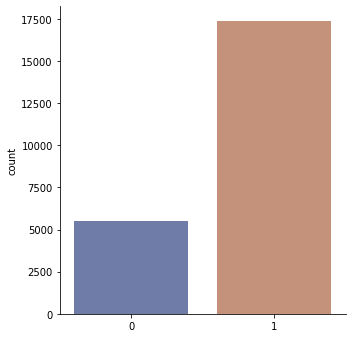

In [12]:
count = []
for i in df['real'].unique():
    count.append(df[df['real'] == i].count()[1])
    
g = sns.catplot(
    data=df, kind="bar",
    x=df['real'].unique(), y=count,alpha=.6,
    palette="dark")

#g.despine(left=True)
g.set_axis_labels("", "count")

# Onehot Representation

In [13]:
contents = x.copy()

In [14]:
contents.head()

,title,news_url,source_domain,tweet_num
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38


In [15]:
import nltk
import re
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(contents)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', contents['title'][i]) # 使用正規表達式 re.sub('[^a-zA-Z]', ' ', messages['title'][i]) 將每筆資料中非英文字母的字元都取代成空白。
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] # 使用迭代器對每個單字做處理。先使用 ps.stem(word) 對單字做詞幹提取，再使用 not word in stopwords.words('english') 判斷是否為停用詞。如果不是停用詞，就將該單字加入處理後的單字清單中。
    review = ' '.join(review)
    corpus.append(review)

串流輸出內容已截斷至最後 5000 行。
17866
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17884
17885
17886
17887
17888
17889
17890
17891
17892
17893
17894
17895
17896
17897
17898
17899
17900
17901
17902
17903
17904
17905
17906
17907
17908
17909
17910
17911
17912
17913
17914
17915
17916
17917
17918
17919
17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
17930
17931
17932
17933
17934
17935
17936
17937
17938
17939
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
1

In [18]:
corpus

['kandi burruss explod rape accus real housew atlanta reunion video',
 'peopl choic award best red carpet look',
 'sophia bush send sweet birthday messag one tree hill co star hilari burton breyton eva',
 'colombian singer maluma spark rumour inappropri relationship aunt',
 'gossip girl year later upper east sider shock world chang pop cultur forev',
 'gwen stefani got dump blake shelton jealousi drama exclus',
 'broward counti sheriff fire lie parkland',
 'amber rose shut french montana date rumor call rapper bruvaaa',
 'mindi kale make first post babi appear disneyland wrinkl time co star',
 'katharin mcphee butcher toni nomin drink',
 'wag miami star ashley nicol robert philip wheeler marri',
 'mel gibson hollywood pedophil nowher left hide',
 'medium tyler henri address chill messag kristin cavallari deceas brother express read',
 'dwt season result week disney night',
 'reason tarek el moussa overcom latest back injuri',
 'david cassidi cut estrang daughter kati complet leav son b

In [19]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2583, 4470, 744, 2384, 601, 2844, 1237, 1135, 2297, 4900],
 [4654, 2091, 8, 3774, 254, 645, 4787],
 [4544,
  3425,
  2581,
  2304,
  270,
  570,
  1109,
  1846,
  2034,
  4279,
  4359,
  2276,
  1112,
  4857,
  4733],
 [3840, 917, 3898, 2560, 3885, 2955, 4931, 4494],
 [3022, 804, 2492, 2982, 235, 2672, 4987, 1668, 3800, 2909, 1700, 3693, 263],
 [968, 2971, 3226, 1801, 2267, 2772, 1051, 120, 3140],
 [860, 3832, 4208, 2714, 3545, 3891],
 [4177, 3864, 2589, 4880, 3007, 1842, 3543, 1999, 4772, 48],
 [4525, 1918, 4645, 2269, 3403, 3725, 3161, 708, 1624, 2852, 4279, 4359],
 [539, 3541, 4546, 2848, 3590, 1894],
 [581, 1549, 4359, 4213, 3321, 2194, 1343, 2692, 398],
 [94, 1223, 4748, 3775, 1725, 926, 3936],
 [2683, 369, 3577, 633, 2369, 570, 4122, 3908, 4439, 1200, 973, 2667],
 [2059, 711, 3447, 555, 1411, 4511],
 [4111, 388, 4999, 719, 3563, 2395, 684, 3562],
 [2856, 4833, 4460, 2360, 1846, 123, 2369, 2640, 4068, 1203],
 [2389, 3704, 1825, 3821, 2279, 156, 2130],
 [3619, 4473, 3346, 4283, 2

# Pad sequence

向前填充

In [20]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 1135 2297 4900]
 [   0    0    0 ...  254  645 4787]
 [   0    0    0 ... 1112 4857 4733]
 ...
 [   0    0    0 ... 1718 3921 4138]
 [   0    0    0 ...  280 2478 3140]
 [   0    0    0 ... 2864 1043    8]]


In [21]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2583,
       4470,  744, 2384,  601, 2844, 1237, 1135, 2297, 4900], dtype=int32)

In [71]:
embedding_vector_features=16
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.8))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.8))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 16)            80000     
                                                                 
 dropout_16 (Dropout)        (None, 20, 16)            0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 121,601
Trainable params: 121,601
Non-trainable params: 0
________________________________________________

轉成ndarray形式方便以TF計算

In [23]:
x_np = np.array(embedded_docs)
y_np = np.array(y)

In [24]:
x_np.shape,y_np.shape

((22866, 20), (22866,))

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.4, random_state=42)

In [59]:
x_train.shape,y_train.shape

((13719, 20), (13719,))

In [60]:
x_test.shape,y_test.shape

((9147, 20), (9147,))

In [72]:
his = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.5340 - accuracy: 0.7687 - val_loss: 0.4444 - val_accuracy: 0.7941
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4382 - accuracy: 0.8120 - val_loss: 0.4162 - val_accuracy: 0.8152
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4054 - accuracy: 0.8234 - val_loss: 0.4121 - val_accuracy: 0.8173
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3884 - accuracy: 0.8307 - val_loss: 0.4062 - val_accuracy: 0.8219
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3742 - accuracy: 0.8380 - val_loss: 0.4055 - val_accuracy: 0.8253


# 訓練紀錄

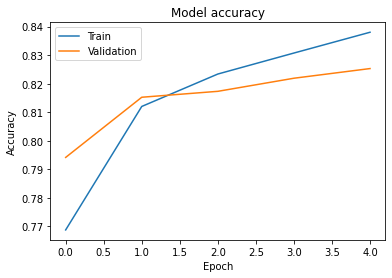

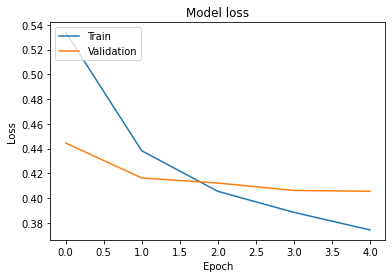

In [73]:
# Plot training & validation accuracy values
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(his.history['loss'])

plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [74]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')

286/286 [==============================] - 1s 3ms/step


In [75]:
print(classification_report(y_test, y_pred))
acc_score = '{:.2%}'.format(accuracy_score(y_test, y_pred))
print(f"\nAccuracy Score: {acc_score}")

              precision    recall  f1-score   support

           0       0.70      0.50      0.59      2244
           1       0.85      0.93      0.89      6903

    accuracy                           0.83      9147
   macro avg       0.78      0.72      0.74      9147
weighted avg       0.81      0.83      0.81      9147


Accuracy Score: 82.53%
